In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
#export
from PIL import Image, ImageFilter
from pathlib import Path
import mimetypes, os, imageio, PIL, inspect
from exp.nb_05 import *
from imgaug import augmenters as iaa
import imgaug as ia
import numpy as np

In [24]:
path=Path(r'E:\images\wallpaper')
c=L(path.iterdir())

In [120]:
c[2]

WindowsPath('E:/images/wallpaper/ana-de-armas-7360x4912-4k-8k-13655.jpg')

In [121]:
img=Image.open(c[2])
img.show()

In [122]:
img.height/15, img.width/15

(327.46666666666664, 490.6666666666667)

In [112]:
#export
def img_factor(img, factor=1, method=Image.BILINEAR):
    return img.resize((int(img.width*factor), int(img.height*factor)), method)

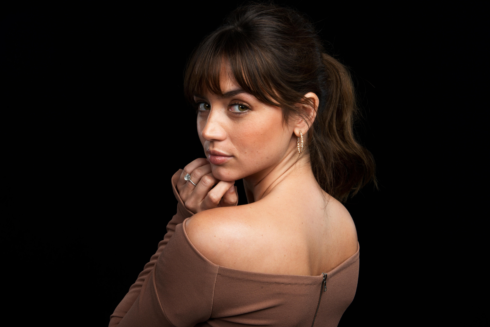

In [29]:
img_factor(img, 15, Image.BILINEAR)

In [38]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im)

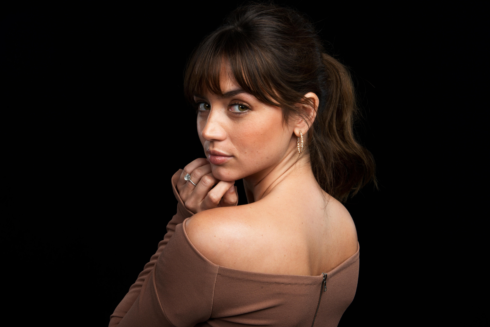

In [123]:
img_factor(img, 1/15)

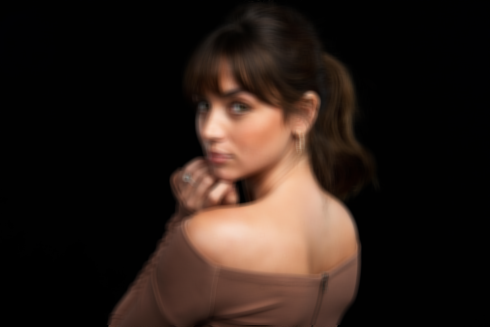

In [124]:
img_1=img_factor(img, 1/15).filter(ImageFilter.BLUR)
img_factor(img_1)

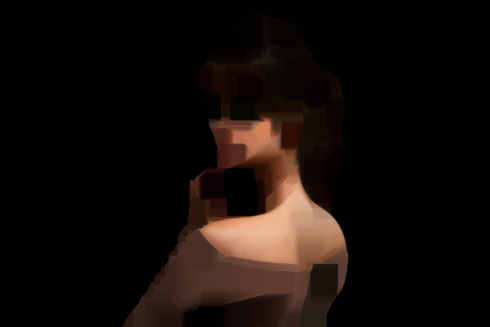

In [125]:
img_1=img_factor(img, 1/15).filter(ImageFilter.MinFilter(23))
img_factor(img_1)

In [6]:
path=Path(r'D:\git\dl\data\cifar')
list(path.iterdir())

[WindowsPath('D:/git/dl/data/cifar/labels.txt'),
 WindowsPath('D:/git/dl/data/cifar/test'),
 WindowsPath('D:/git/dl/data/cifar/train')]

In [16]:
path_train=path/'train'
train_path=L(path_train.iterdir())

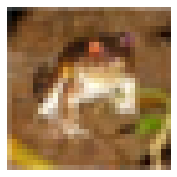

In [39]:
frog_img=train_path[0]
img=PIL.Image.open(frog_img)
show_image(img)

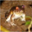

In [40]:
img

In [46]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [50]:
#export
Path.ls = lambda x: L(x.iterdir())

In [51]:
path_train.ls()

L (50000 items)
[WindowsPath('D:/git/dl/data/cifar/train/0_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10000_automobile.png'), WindowsPath('D:/git/dl/data/cifar/train/10001_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10002_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10003_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10004_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10005_cat.png'), WindowsPath('D:/git/dl/data/cifar/train/10006_deer.png'), WindowsPath('D:/git/dl/data/cifar/train/10007_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10008_airplane.png')...]

In [52]:
#export
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [53]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [61]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p) if not isinstance(p, Path) else p
    res = L(p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions))
    return res

In [66]:
t = [o.name for o in os.scandir(path_img)]
t = _get_files(path, t, extensions=image_extensions)
t

L (50000 items)
[WindowsPath('E:/images/wallpaper/0_frog.png'), WindowsPath('E:/images/wallpaper/10000_automobile.png'), WindowsPath('E:/images/wallpaper/10001_frog.png'), WindowsPath('E:/images/wallpaper/10002_frog.png'), WindowsPath('E:/images/wallpaper/10003_ship.png'), WindowsPath('E:/images/wallpaper/10004_ship.png'), WindowsPath('E:/images/wallpaper/10005_cat.png'), WindowsPath('E:/images/wallpaper/10006_deer.png'), WindowsPath('E:/images/wallpaper/10007_frog.png'), WindowsPath('E:/images/wallpaper/10008_airplane.png')...]

In [157]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = L
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = L(o.name for o in os.scandir(path) if o.is_file())
        return _get_files(path, f, extensions)

In [158]:
get_files(path_img, image_extensions).__len__

<bound method L.__len__ of L (50000 items)
[WindowsPath('D:/git/dl/data/cifar/train/0_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10000_automobile.png'), WindowsPath('D:/git/dl/data/cifar/train/10001_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10002_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10003_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10004_ship.png'), WindowsPath('D:/git/dl/data/cifar/train/10005_cat.png'), WindowsPath('D:/git/dl/data/cifar/train/10006_deer.png'), WindowsPath('D:/git/dl/data/cifar/train/10007_frog.png'), WindowsPath('D:/git/dl/data/cifar/train/10008_airplane.png')...]>

In [159]:
get_files(path_img, image_extensions, recurse=True)

TypeError: unsupported operand type(s) for +=: 'type' and 'L'

In [156]:
L

exp.nb_04.L

In [141]:
path_hr=Path(r'E:\documents\papers')
doc_fol=get_files(path_hr,image_extensions)
import imageio

In [104]:
doc_fol[-1]

WindowsPath('E:/documents/papers/hroct_n.jpg')

Original:


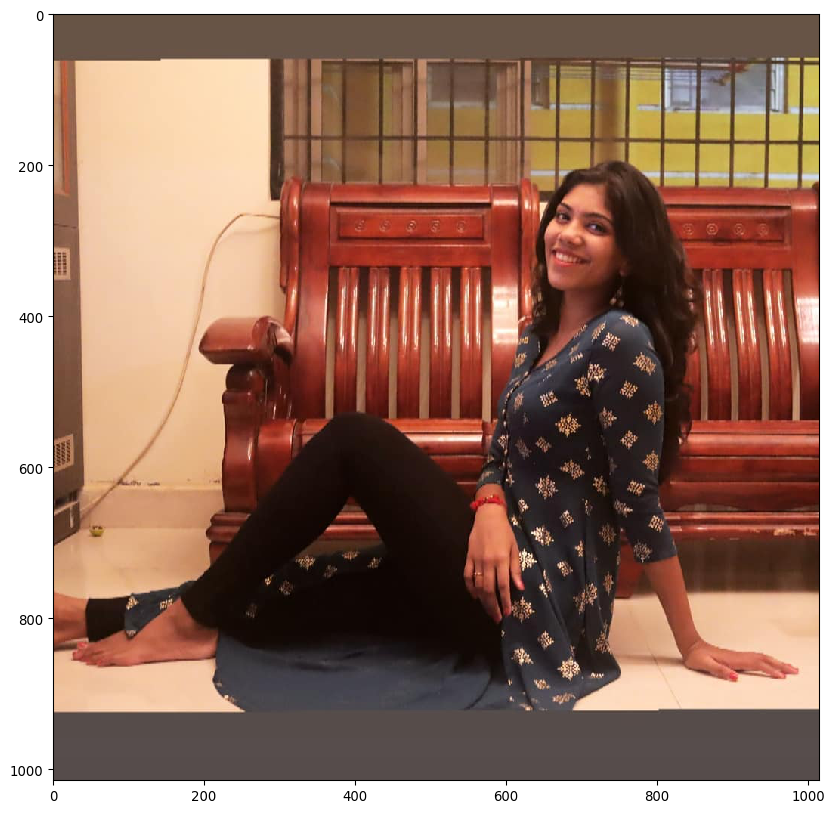

In [152]:
image = imageio.imread('https://instagram.fblr1-3.fna.fbcdn.net/vp/64cc81fca67a05f9ffda9793930d46f1/5E58FA91/t51.2885-15/e35/75538146_2103664023263229_2678085243821240235_n.jpg?_nc_ht=instagram.fblr1-3.fna.fbcdn.net&_nc_cat=109')

print("Original:")
ia.imshow(image)

Augmented:


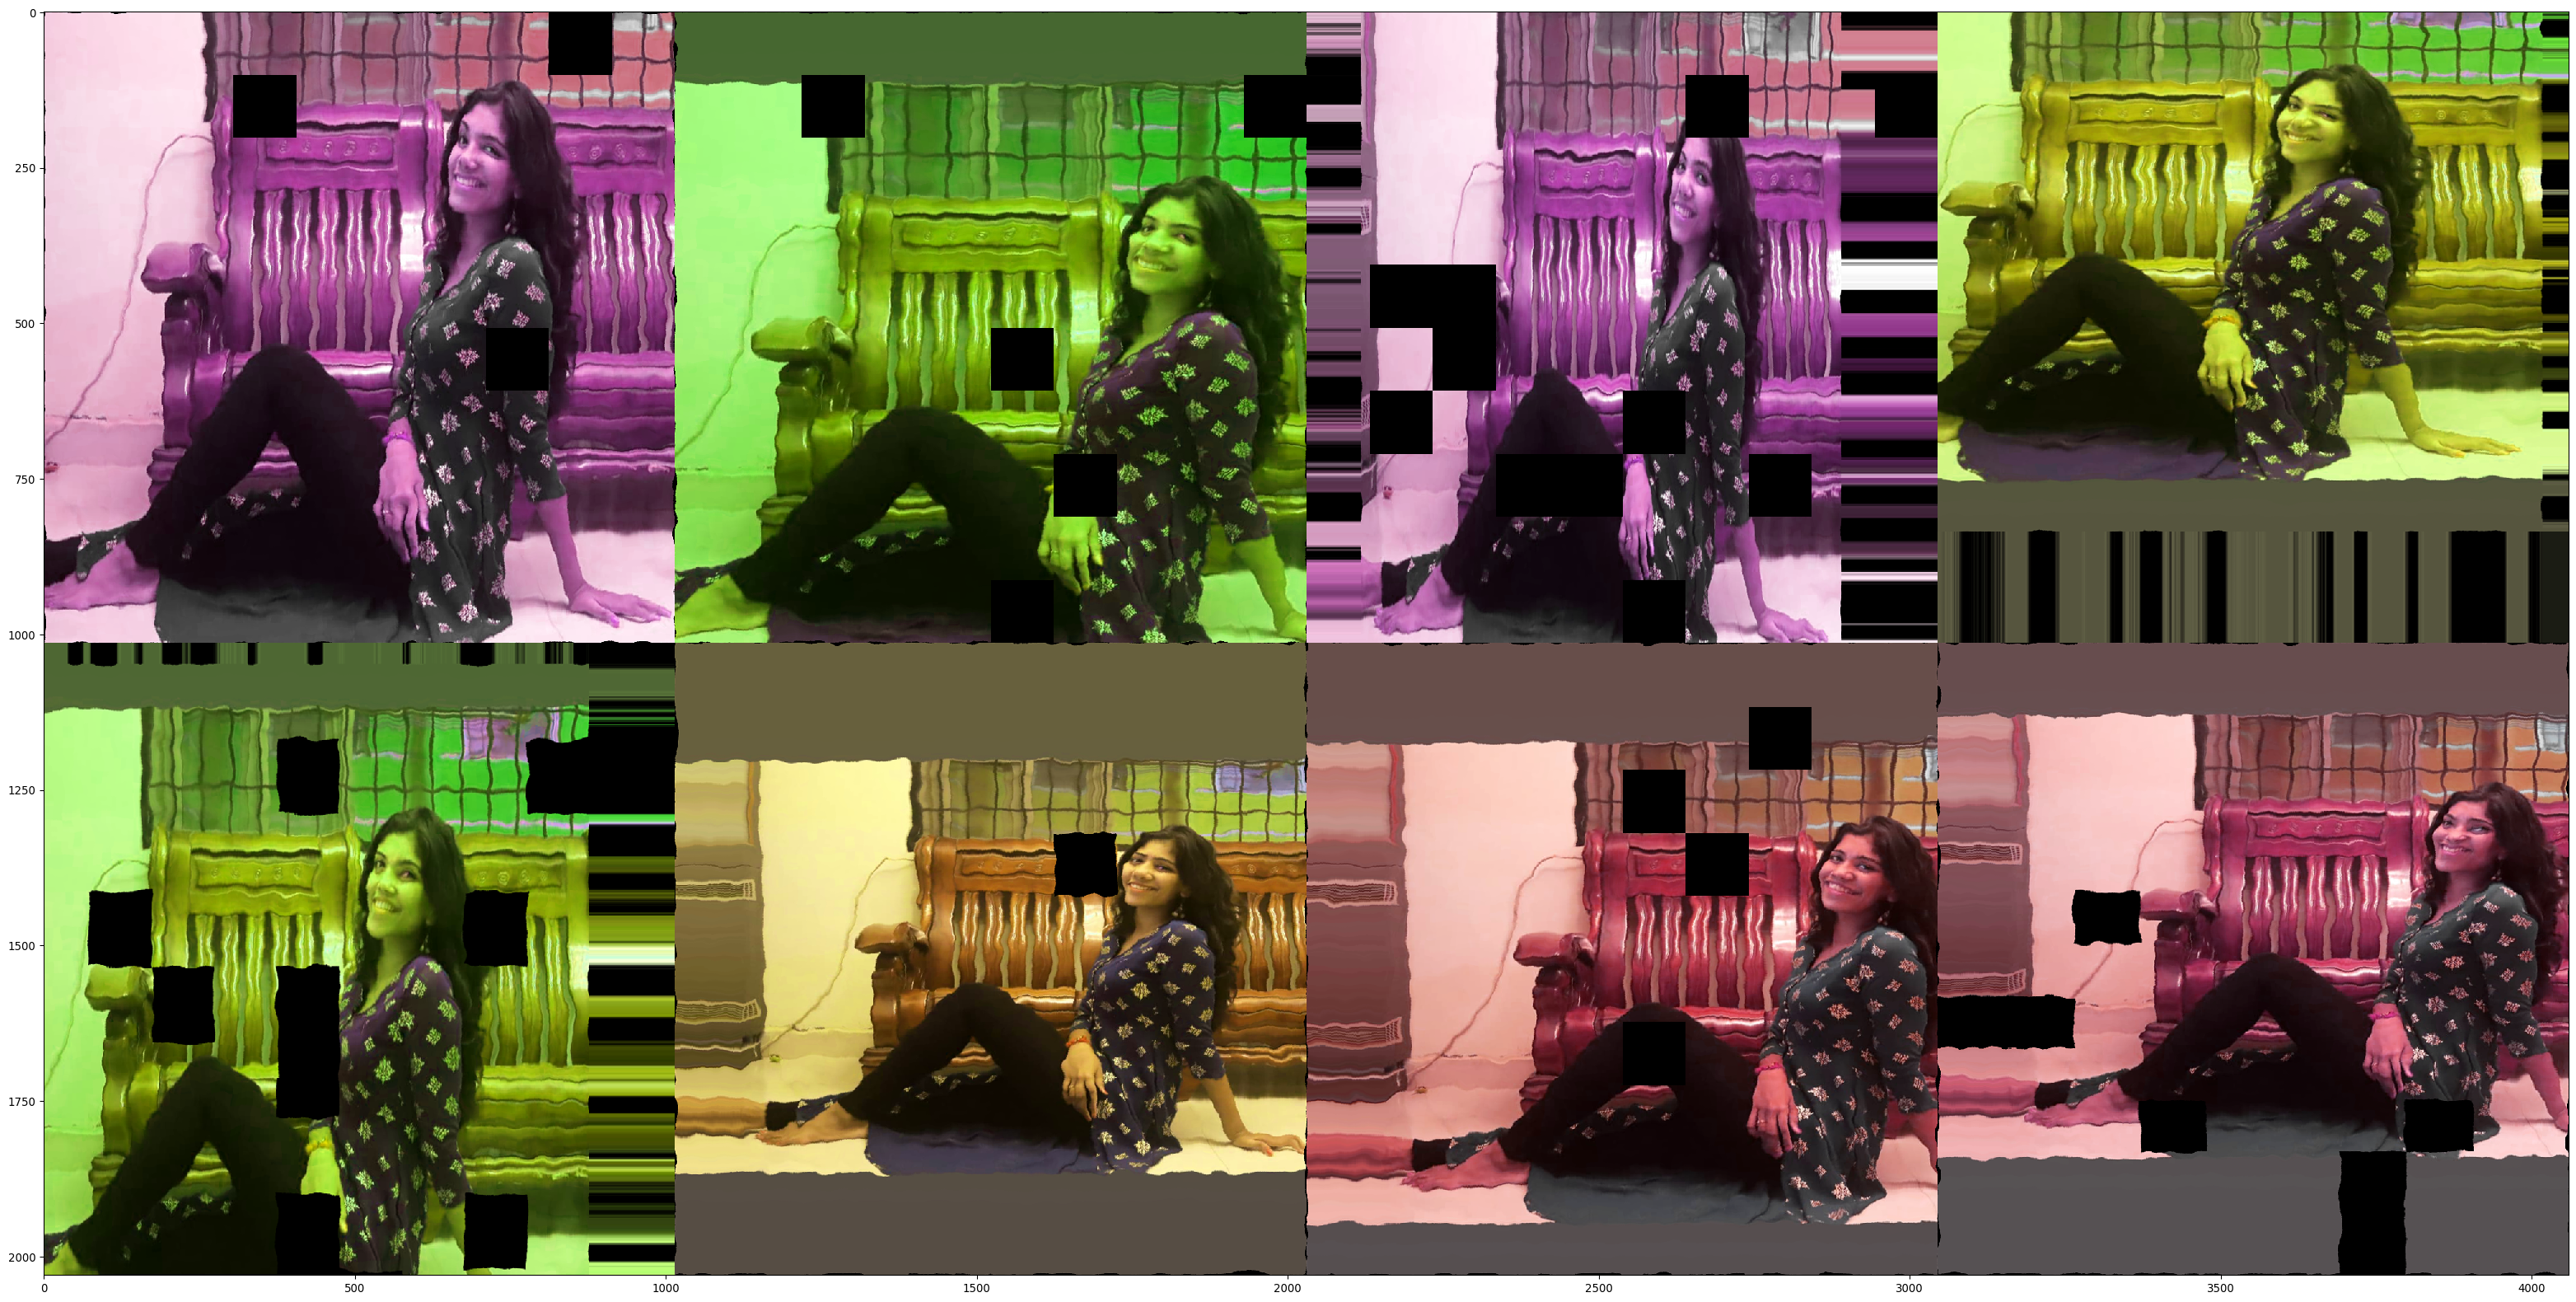

In [149]:
seq = iaa.Sequential([
    iaa.CropAndPad(percent=(-0.2, 0.2), pad_mode="edge"),  # crop and pad images
    iaa.AddToHueAndSaturation((-60, 60)),  # change their color
    iaa.ElasticTransformation(alpha=90, sigma=11),  # water-like effect
    iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)  # set large image areas to zero
], random_order=True)

images_aug = np.array([seq.augment_image(image) for _ in range(8)])

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=2))

In [140]:
images_aug

NameError: name 'images_aug' is not defined